#                 **TELCO CUSTOMER  CHURN PREDICTION**

About Dataset :
Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month - the column is called Churn

*   Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

*   Customer account information  - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges

*   Customer account information  - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges

*   Demographic info about customers  - gender, age range, and if they have partners and dependents
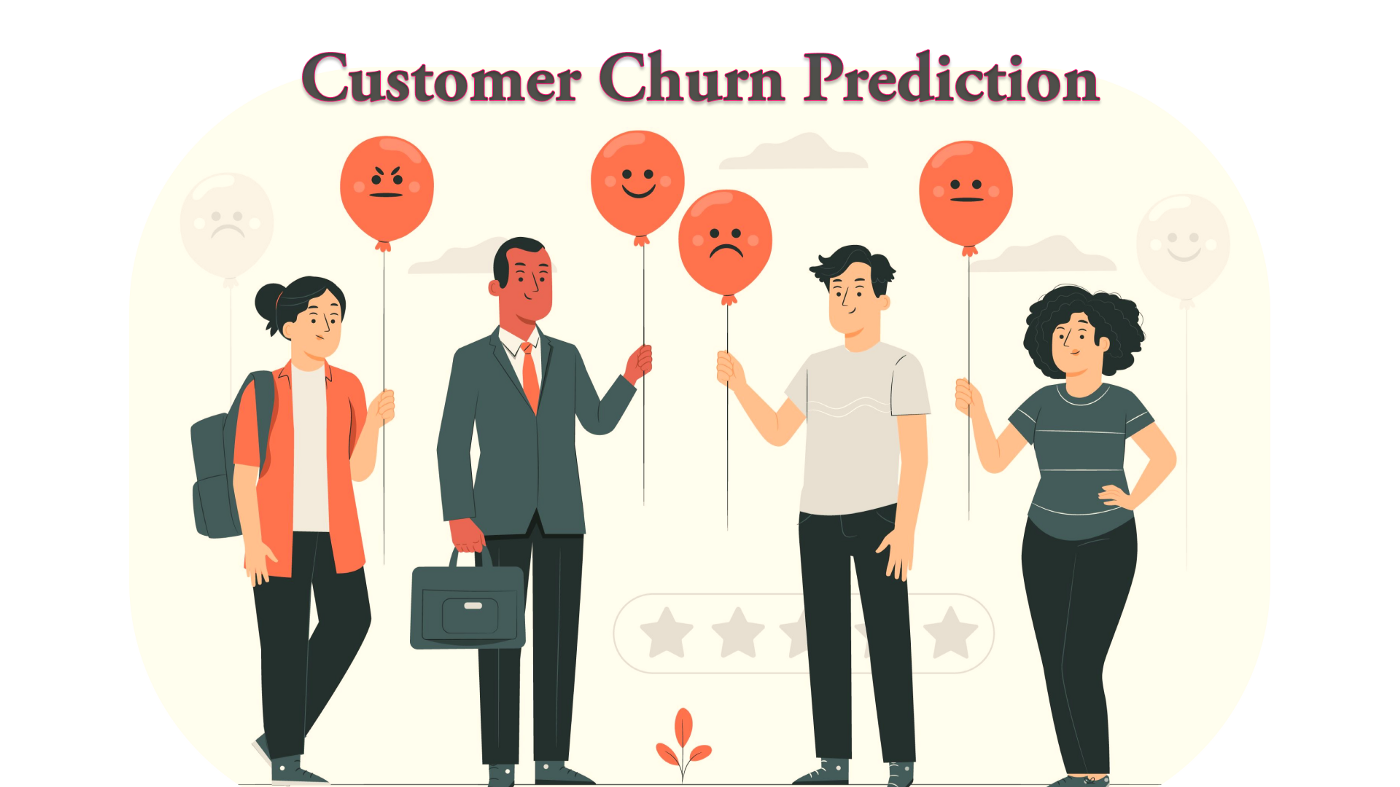
Inspiration
To explore this type of models and learn more about the subject.





In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np
%matplotlib inline

#Exploring the data

In [ ]:
data = pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape
data.columns
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
data.drop('customerID', axis='columns', inplace=True)

In [ ]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df = data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [ ]:
df.shape


(11, 20)

In [ ]:
df1 = data[data.TotalCharges != ' ']
df1.shape

(7032, 20)

In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1[df1.Churn == 'No']

<ipython-input-433-eccc8a33d2e0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


#**Data Visualization**

(5163,)

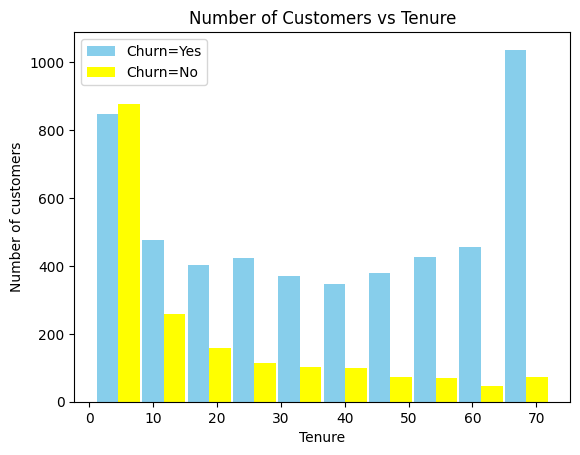

In [ ]:
tenure_no = df1[df1.Churn == 'No'].tenure
tenure_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Number of Customers vs Tenure")

plt.hist([tenure_no, tenure_yes], rwidth=0.95, color=['skyblue', 'yellow'], label=['Churn=Yes','Churn=No'])
plt.legend()
tenure_no.shape

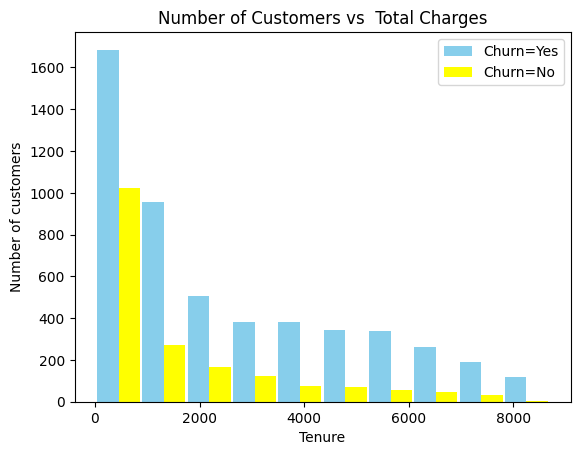

In [ ]:
charges_no = df1[df1.Churn == 'No'].TotalCharges
charges_yes = df1[df1.Churn == 'Yes'].TotalCharges

plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Number of Customers vs  Total Charges")

plt.hist([charges_no, charges_yes], rwidth=0.95, color=['skyblue', 'yellow'], label=['Churn=Yes','Churn=No'])
plt.legend()

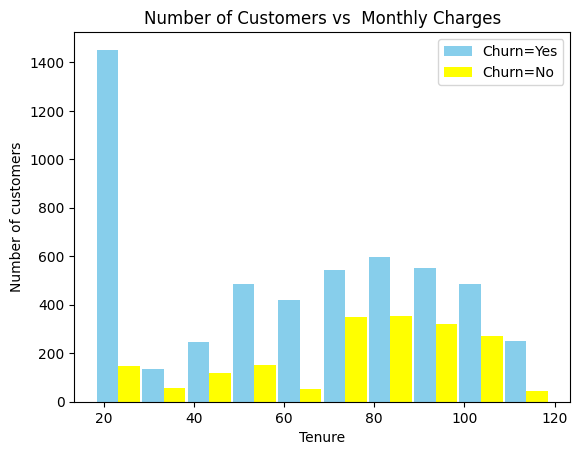

In [ ]:
charges_no = df1[df1.Churn == 'No'].MonthlyCharges
charges_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Number of Customers vs  Monthly Charges")

plt.hist([charges_no, charges_yes], rwidth=0.95, color=['skyblue', 'yellow'], label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
print(df1["Churn"][df1["Churn"]=="No"].groupby(by=df1["gender"]).count())

gender
Female    2544
Male      2619
Name: Churn, dtype: int64


In [ ]:
print(df1["Churn"][df1["Churn"]=="Yes"].groupby(by=df1["gender"]).count())

gender
Female    939
Male      930
Name: Churn, dtype: int64


In [ ]:
!pip install plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df1['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df1['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

Both genders have almost equal responses in terms of high and low churn rates.

In [ ]:
labels = df1['PaymentMethod'].unique()
values = df1['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [ ]:
fig = px.histogram(df1, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
df1["Churn"].unique()

array([0, 1])

A major chunk of customers who opted for a different provider had Electronic Check as their Payment method. Customers opting for Automatic Bank transfer and Automatic Credit Card aren't really a major part of the churn.

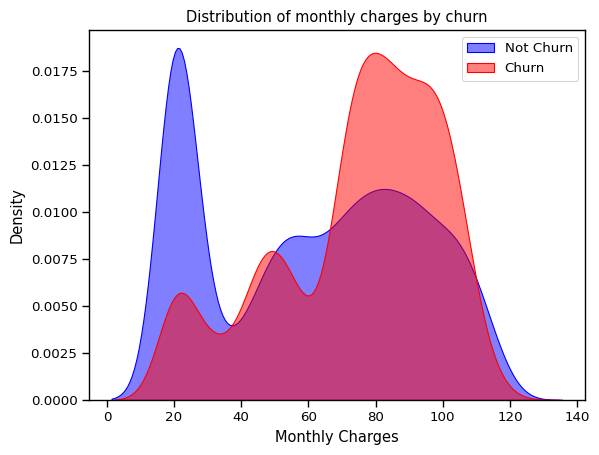

In [ ]:
sb.set_context("paper", font_scale=1.1)
fig, ax = plt.subplots()
# Plot for Churn == 'No' in Red
sb.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0)], ax=ax, color="Blue", fill=True, label="Not Churn",  alpha=0.5)
sb.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1)], ax=ax, color="Red", fill=True, label="Churn",  alpha=0.5)

ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
ax.legend(loc='upper right')

plt.show()

*   Customers having higher monthly charges are having a higher churn rate.



In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

*   A large number of customers chose the **Fiber Optic type** of internet service and a large number of customers having a **high churn rate** have opted for a Fiber Optic internet service.
*   Customers opting for DSL have a lower churn rate compared to Fiber Optic Customers.



In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df1, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without any online security are more likely to churn.

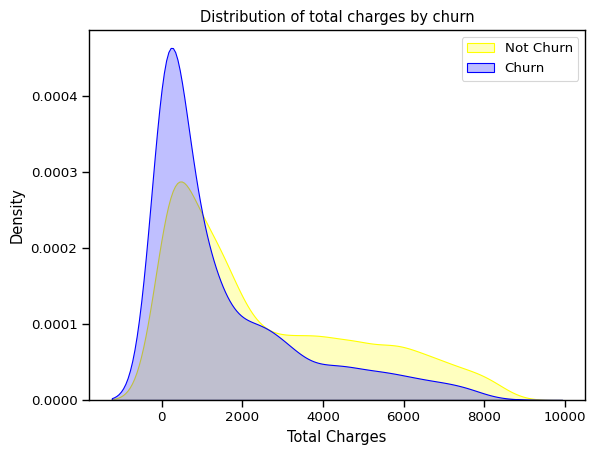

In [ ]:
ax = sb.kdeplot(df1.TotalCharges[(df1["Churn"] == 0) ],
                color="Yellow", fill = True);
ax = sb.kdeplot(df1.TotalCharges[(df1["Churn"] == 1) ],
                ax =ax, color="Blue", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [ ]:
  def explore_col_values(df):
    for col in df:
          if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()}')

explore_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-445-34dfac0bf179>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for col in df1:
  print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : ['No phone service' 0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1 'No internet service']
OnlineBackup : [1 0 'No internet service']
DeviceProtection : [0 1 'No internet service']
TechSupport : [0 1 'No internet service']
StreamingTV : [0 1 'No internet service']
StreamingMovies : [0 1 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Chu

In [ ]:
extra_no_features = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df1[extra_no_features].replace('No', 0, inplace=True)

<ipython-input-447-d77ad79b8220>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#One Hot Encoding for the categorical values

In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2['MultipleLines'].replace('No', 0, inplace=True)

##Since Columns of Tenure, MonthlyCharges and TotalCharges have different   ranges, we need to scale them using some scaling technique

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.replace({'No internet service', 'No phone service'}, 0, inplace=True)
df2['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
df2.shape

(7032, 27)

In [ ]:
X_test.shape

(2110, 26)

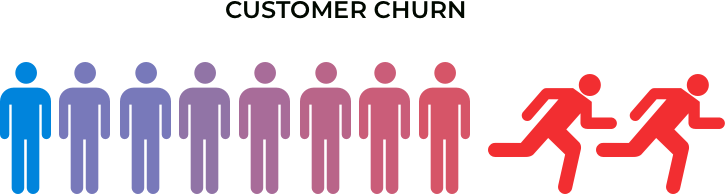

#Prediction using ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (26,)),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.6905 - accuracy: 0.6116
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7842
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7931
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8007
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.7991
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8037
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8050
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8057
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4088 - accura

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7754


[0.4720298945903778, 0.7754086852073669]

In [ ]:
y_predicted = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [ ]:
y_pred = []
for element in y_predicted:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 1, 0, 0, 1, 1, 0, 0, 0, 0]

In [ ]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       999
           1       0.63      0.56      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



##The Precision, Recall and f1-score for the case when churn = 1 is low and that is due to an imbalanced dataset.

Text(95.72222222222221, 0.5, 'Truth value for churn')

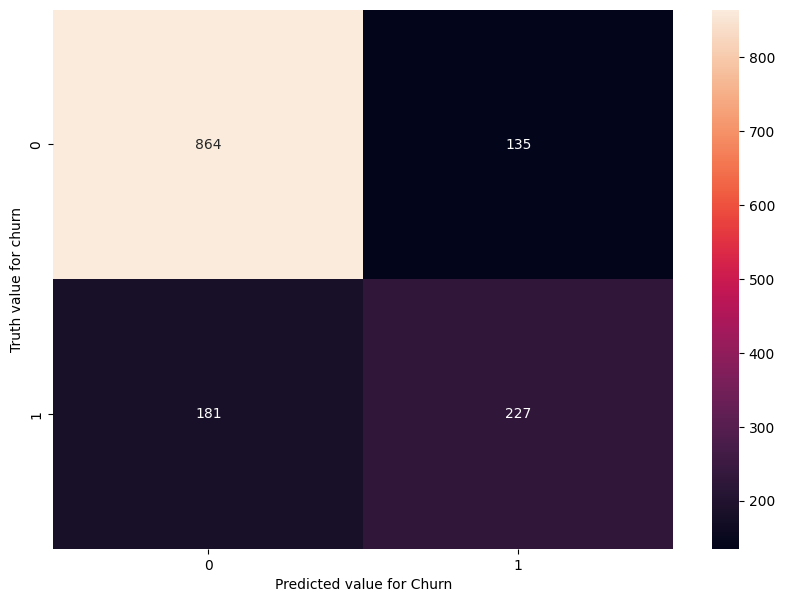

In [ ]:
import seaborn as sb
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10, 7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted value for Churn')
plt.ylabel('Truth value for churn')

In [ ]:
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5084 - accuracy: 0.7440
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.7904
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7961
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8028
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4125 - accuracy: 0.8066
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8091
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8084
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4069 - accuracy: 0.8087
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4055 - accuracy: 0.8066
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4028 - accura

#Mitigating Skewdness of Data

##Method 1 : SMOTE

In [ ]:
!pip install imbalanced-learn

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5267 - accuracy: 0.7519
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4711 - accuracy: 0.7785
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4621 - accuracy: 0.7835
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4560 - accuracy: 0.7857
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4517 - accuracy: 0.7880
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4468 - accuracy: 0.7944
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4438 - accuracy: 0.7949
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.7979
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4354 - accuracy: 0.7978
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4324 - accura

### As we can see there is a massive improvement in the **f1-score** from **0.55 to 0.81**

##Use of Ensemble with Undersampling

Text(95.72222222222221, 0.5, 'Truth value for churn')

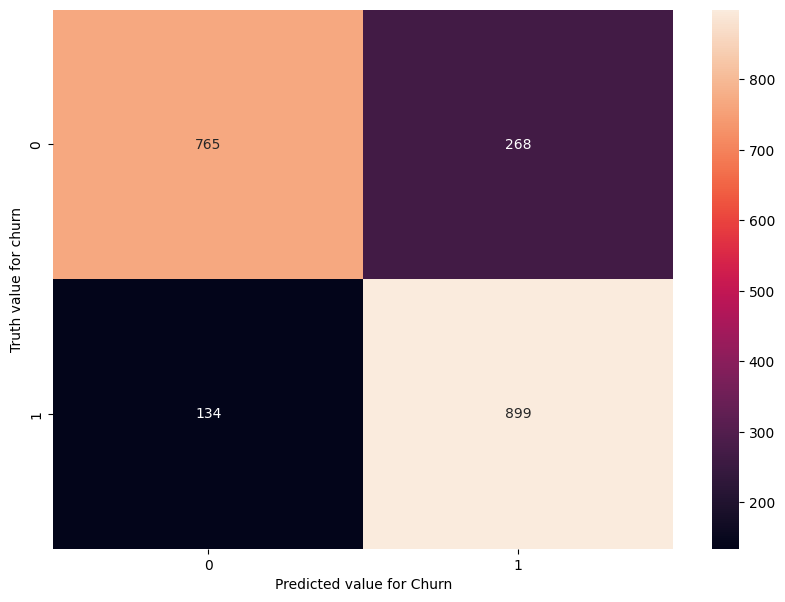

In [ ]:
import seaborn as sb
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)

plt.figure(figsize = (10, 7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted value for Churn')
plt.ylabel('Truth value for churn')

In [ ]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from imblearn.over_sampling import ADASYN

smote = ADASYN(sampling_strategy='auto', random_state=None, n_neighbors=4)
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    5385
0    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
264/264 [==============================] - 2s 3ms/step - loss: 0.5456 - accuracy: 0.7283
Epoch 2/100
264/264 [==============================] - 1s 2ms/step - loss: 0.4996 - accuracy: 0.7598
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 0.4894 - accuracy: 0.7619
Epoch 4/100
264/264 [==============================] - 1s 2ms/step - loss: 0.4810 - accuracy: 0.7693
Epoch 5/100
264/264 [==============================] - 1s 2ms/step - loss: 0.4747 - accuracy: 0.7708
Epoch 6/100
264/264 [==============================] - 1s 2ms/step - loss: 0.4694 - accuracy: 0.7753
Epoch 7/100
264/264 [==============================] - 1s 2ms/step - loss: 0.4626 - accuracy: 0.7758
Epoch 8/100
264/264 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.7835
Epoch 9/100
264/264 [==============================] - 1s 2ms/step - loss: 0.4520 - accuracy: 0.7900
Epoch 10/100
264/264 [==============================] - 1s 2ms/step - loss: 0.4466 - accura

#Using Some ML Models to compare with the ANN

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

#Random Forest Classifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)
print (accuracy_score(y_test, prediction_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



0.7687203791469195


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1033
           1       0.75      0.83      0.79      1077

    accuracy                           0.77      2110
   macro avg       0.77      0.77      0.77      2110
weighted avg       0.77      0.77      0.77      2110



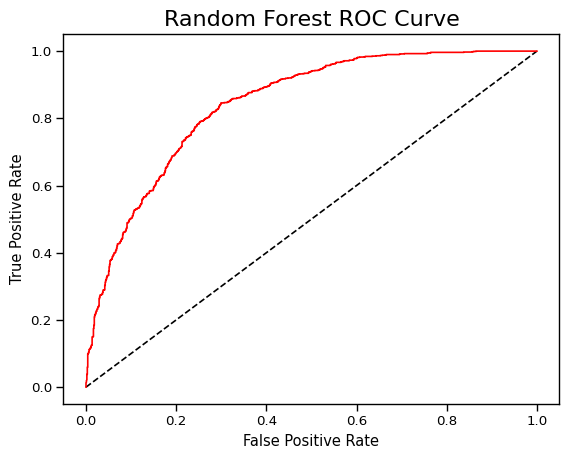

In [ ]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

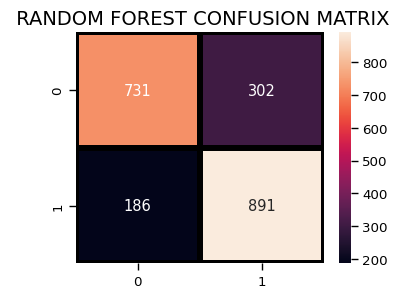

In [ ]:
plt.figure(figsize=(4,3))
sb.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

#Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7843601895734598


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1033
           1       0.77      0.82      0.79      1077

    accuracy                           0.78      2110
   macro avg       0.79      0.78      0.78      2110
weighted avg       0.79      0.78      0.78      2110



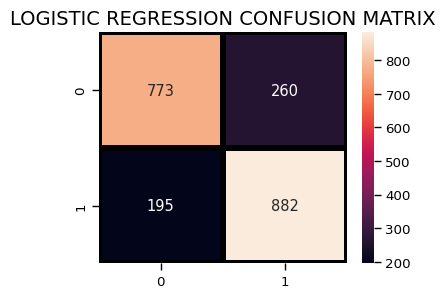

In [ ]:
plt.figure(figsize=(4,3))
sb.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

#Adaboost Classifier

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.7639810426540284

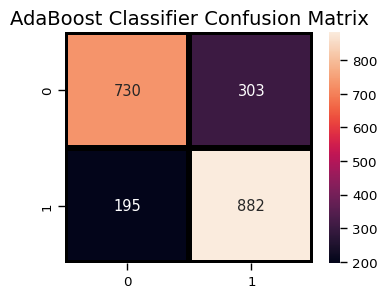

In [ ]:
plt.figure(figsize=(4,3))
sb.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

#Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7644549763033175


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1033
           1       0.77      0.77      0.77      1077

    accuracy                           0.76      2110
   macro avg       0.76      0.76      0.76      2110
weighted avg       0.76      0.76      0.76      2110



Customer churn poses a significant threat to a firm's profitability. To mitigate this, implementing effective strategies is crucial. One of the most impactful methods is for a company to deeply understand its customers. This involves not only identifying those at risk of churning but also actively enhancing their satisfaction levels. Elevating customer service to the forefront of operations is paramount in addressing this challenge. Additionally, cultivating customer loyalty through personalized experiences and tailored services is a key strategy for reducing churn rates. Some organizations opt to conduct surveys with former customers to grasp their reasons for leaving, enabling a proactive approach to prevent future churn instances.

#Thank You